In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

---
# 

---
---
---

# カーネル主成分の導出

カーネル主成分分析は、学習データ:$x_{i} \in R^{d} \quad (i=1,...,N)$を非線形特徴変換$x_{i} \in R^{d} \rightarrow \varphi \left( { x }_{ i } \right) \in R^{ M }\quad (M>d)$をしてより高次元のデータに変換した上でPCAを行う分析手法である。

![](http://www1.doshisha.ac.jp/~mjin/R/Chap_31/image1.jpg)

参考サイト

 - [カーネル法による非線形データ解析入門 - 統計数理研究所](http://www.ism.ac.jp/~fukumizu/papers/Kernel_rois2006.pdf)
 - [PCAの最終形態GPLVMの解説 - SlideShare](https://www.slideshare.net/antiplastics/pcagplvm)
 - [Kernel PCA (Principal Component Analysis) の導出 - めもめも](http://enakai00.hatenablog.com/entry/2016/09/09/103142)
 - [主成分分析のあれこれ - Qiita](http://qiita.com/kenchin110100/items/16f49da7dc207a31b160#%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)
 - [Rとカーネル法・サポートベクターマシン](http://www1.doshisha.ac.jp/~mjin/R/Chap_31/31.html)
 - [sklearnによるKernelPCAの実装](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#examples-using-sklearn-decomposition-kernelpca)


## カーネル関数を決める


## データから写像行列を求める

## 写像行列の固有値と固有ベクトル
## 固有値と固有ベクトルを正規化する

---
# 実装

In [4]:
#データによる検証
HR_DATASET_PATH = "../datasets/HR_comma_sep.csv"

hr_df = pd.read_csv(HR_DATASET_PATH)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

left_employee_df = hr_df[hr_df.left == 1]
features = [
    'satisfaction_level',
    'last_evaluation',
    'number_project'
]

# データを標準化する
ss = StandardScaler()
X = ss.fit_transform(left_employee_df[features])

DIM = 2

# 主成分分析する
kpca = KernelPCA(n_components=DIM, kernel='rbf') # 第2主成分まで求める。
kpca.fit(X)

# 分析結果を元にデータセットを主成分に変換する
transformed = kpca.fit_transform(X)

In [8]:
kpca.get_params()

{'alpha': 1.0,
 'coef0': 1,
 'copy_X': True,
 'degree': 3,
 'eigen_solver': 'auto',
 'fit_inverse_transform': False,
 'gamma': None,
 'kernel': 'rbf',
 'kernel_params': None,
 'max_iter': None,
 'n_components': 2,
 'n_jobs': 1,
 'random_state': None,
 'remove_zero_eig': False,
 'tol': 0}

/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


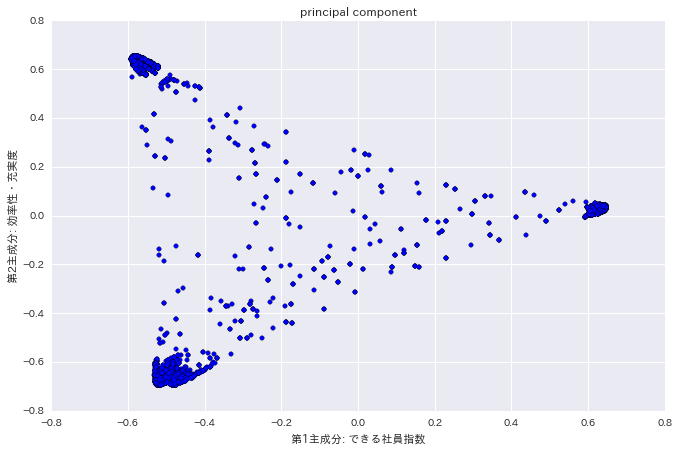

In [9]:
# 主成分をプロットする
plt.figure(figsize=(11,7))
plt.title('principal component')
plt.xlabel('第1主成分: できる社員指数')
plt.ylabel('第2主成分: 効率性・充実度')

plt.scatter(
    transformed[:, 0],
    transformed[:, 1],
)

# グラフを表示する
plt.show()

---
# 参考文献

書籍
 - Sebastian Raschka, Vahid Mirjalili[2018]「5.3 カーネル主成分分析を使った非線形写像」『［第2版］Python機械学習プログラミング達人データサイエンティストによる理論と実践』株式会社インプレス（162~180頁）

Webサイト
 - [python-machine-learning-book-2nd-edition/ch05.ipynb at master · rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch05/ch05.ipynb)